In [2]:
from orangecontrib.argument.miner.chunker import TopicModel, get_chunk, get_chunk_polarity_score, get_chunk_topic, get_chunk_rank, get_chunk_table
import pandas as pd
import numpy as np

In [3]:
docs = [
    "I stayed up all night writing, so I was tired the next day", 
    "I have two goldfish and a cat.", 
    "The box is as tall as it is wide.", 
    "Unless we give him a ride, he won’t be able to come."
]
arg_ids, chunks = get_chunk(docs=docs)
pd.DataFrame({
    "arg_id": arg_ids, 
    "chunk": chunks, 
})

,arg_id,chunk
0,0,I was tired the next day
1,0,"I stayed up all night writing , so"
2,1,I have two goldfish and a cat .
3,2,The box is as tall as it is wide .


In [108]:
arg_ids = [0, 0, 0, 0]
embeds = np.array([
    [0, 1], 
    [0.2, 0.8], 
    [0,4, 1.6], 
    [1, 0.2], 
], dtype=float)

In [109]:
import torch
embeds = list(embeds)
embeds = torch.tensor(embeds)
embeds /= embeds.norm(dim=-1).unsqueeze(-1)
sim_mat = torch.matmul(embeds, embeds.t())
sim_mat = sim_mat.numpy(force=True)
sim_mat

array([[1.        , 0.9701425 , 0.19611614],
       [0.9701425 , 1.        , 0.42808634],
       [0.19611614, 0.42808634, 1.        ]])

In [113]:
import networkx as nx

g = nx.from_numpy_array(sim_mat)
ranks = nx.pagerank(g).values()
ranks

dict_values([0.3428965689859638, 0.37688562885463417, 0.2802178021594017])

In [115]:
ranks[1] > ranks[0] > ranks[2]

True

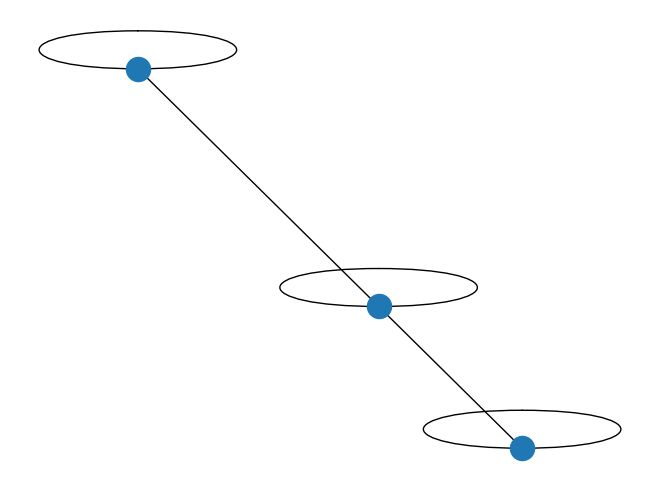

In [107]:
nx.draw(g)